## Disease Symptoms and Patient Profile Project

In this project we are going to study the connection between the symptoms and medical history of patients to some diseases.
<br>The file we have available is in csv format and we are going to read it, right after doing some essential imports for the project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc, plot_roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from colorama import Fore
from colorama import Style

import warnings
warnings.filterwarnings('ignore')

The dataset was available on Kaggle at the following link: https://www.kaggle.com/datasets/uom190346a/disease-symptoms-and-patient-profile-dataset/ .
It contains records about 349 patients and the columns of the dataset are:
<br>Disease: The name of the disease or medical condition.
<br>Fever: Indicates whether the patient has a fever (Yes/No).
<br>Cough: Indicates whether the patient has a cough (Yes/No).
<br>Fatigue: Indicates whether the patient experiences fatigue (Yes/No).
<br>Difficulty Breathing: Indicates whether the patient has difficulty breathing (Yes/No).
<br>Age: The age of the patient in years.
<br>Gender: The gender of the patient (Male/Female).
<br>Blood Pressure: The blood pressure level of the patient (Normal/High).
<br>Cholesterol Level: The cholesterol level of the patient (Normal/High).
<br>Outcome Variable: The outcome variable indicating the result of the diagnosis or assessment for the specific disease (Positive/Negative).

In [2]:
df=pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')

In [3]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


Next let us check if any of the values are null:

In [4]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

Good to see that there are no null values in the DataFrame.
Next we are going to check for duplicated values:

In [13]:
df.loc[df.duplicated()]

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
23,Dengue Fever,Yes,No,Yes,No,30,Female,Normal,Normal,Negative
35,Asthma,Yes,Yes,No,Yes,30,Female,Normal,Normal,Positive
40,Bronchitis,Yes,Yes,Yes,Yes,30,Male,High,High,Positive
59,Asthma,No,Yes,Yes,Yes,35,Female,High,Normal,Negative
69,Pneumonia,Yes,Yes,Yes,Yes,35,Female,Normal,Normal,Negative
73,Rubella,Yes,No,Yes,No,35,Female,High,Normal,Negative
76,Asthma,Yes,Yes,No,Yes,35,Male,Normal,Normal,Positive


As we can see at first glance, while the `df.duplicated()` filter reports the rows which have duplicate values in the 'True' or 'False' columns, these patients are actually not duplicates because the age and the disease are always different. This is the reason why we are not going to filter out these values, but keep them as unique values since the 'Age' and 'Disease' columns are always different.

We will plot now explore each one of the columns to get a sense of the distribution of their values.
<br>We will first look at the columns that have more than just 2 values and their distribution, and then we will move on to the columns with only 2 or 3 variables (all the true or false, and the 'Blood Pressure' and 'Cholesterol').

First let use look at how many different diseases we are looking at and their frequency:

In [43]:
y=df['Disease']
y.value_counts(normalize=True)

Asthma              0.065903
Stroke              0.045845
Osteoporosis        0.040115
Hypertension        0.028653
Diabetes            0.028653
                      ...   
Bladder Cancer      0.002865
Hemorrhoids         0.002865
Bipolar Disorder    0.002865
Osteomyelitis       0.002865
Cirrhosis           0.002865
Name: Disease, Length: 116, dtype: float64

In [45]:
y=df['Disease']
y.value_counts()

Asthma              23
Stroke              16
Osteoporosis        14
Hypertension        10
Diabetes            10
                    ..
Bladder Cancer       1
Hemorrhoids          1
Bipolar Disorder     1
Osteomyelitis        1
Cirrhosis            1
Name: Disease, Length: 116, dtype: int64

This is a very important information so we will create a special column to indicate this, since we will need to do some manipulation on it.

In [49]:
count_freq = dict(df['Disease'].value_counts())

In [50]:
df['count_freq'] = df['Disease']
df['count_freq'] = df['count_freq'].map(count_freq)

In [51]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,count_freq
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,8
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,6
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,6
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,23
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,23
...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,16
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive,16
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive,16
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,16


Now let us preview all the frequencies:

In [53]:
count_freq

{'Asthma': 23,
 'Stroke': 16,
 'Osteoporosis': 14,
 'Hypertension': 10,
 'Diabetes': 10,
 'Migraine': 10,
 'Pneumonia': 8,
 'Influenza': 8,
 'Bronchitis': 8,
 'Hypothyroidism': 7,
 'Hyperthyroidism': 7,
 'Common Cold': 6,
 'Anxiety Disorders': 6,
 'Liver Cancer': 6,
 'Eczema': 6,
 'Allergic Rhinitis': 6,
 'Depression': 6,
 'Osteoarthritis': 6,
 'Gastroenteritis': 6,
 'Rheumatoid Arthritis': 6,
 'Kidney Cancer': 6,
 "Parkinson's Disease": 5,
 "Crohn's Disease": 5,
 'Psoriasis': 5,
 "Alzheimer's Disease": 5,
 'Kidney Disease': 5,
 'Multiple Sclerosis': 5,
 'Liver Disease': 5,
 'Pancreatitis': 5,
 'Urinary Tract Infection': 5,
 'Ulcerative Colitis': 5,
 'Coronary Artery Disease': 5,
 'Chronic Obstructive Pulmonary Disease (COPD)': 4,
 'Tuberculosis': 3,
 'Hepatitis': 3,
 'Urinary Tract Infection (UTI)': 3,
 'Lung Cancer': 3,
 'Rubella': 2,
 'Dengue Fever': 2,
 'Hepatitis B': 2,
 'Lyme Disease': 2,
 'Malaria': 2,
 'Cholera': 2,
 'Tetanus': 2,
 'Chickenpox': 2,
 'Typhoid Fever': 2,
 'Turner

As we can see there are many diseases that are represented by only one two or three samples (patients).
<br>Statistically we cannot expect the model to be able to identify these cases correctly since there are not enough samples for the model to learn.
<br>Because of this we will filter out the diseases that appear less than 5 times.

In [57]:
df=df[df.count_freq>4]
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,count_freq
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,8
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,6
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,6
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,23
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,23
...,...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive,16
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive,16
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive,16
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive,16


Now let us look again at the amount of diseases and see if in this way we can preview them in a reasonable way.

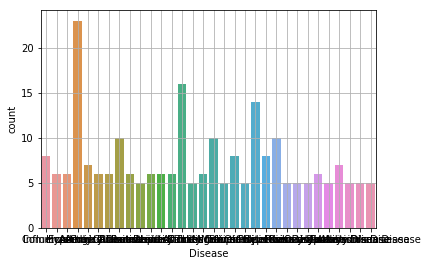

In [59]:
sns.countplot(df['Disease'])
plt.grid()
plt.show()




([array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 1., 0., 0.

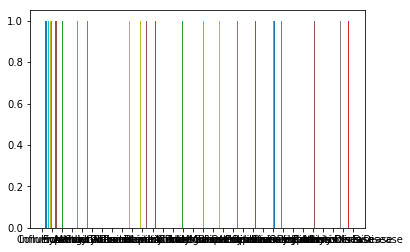

In [60]:
plt.hist(df['Disease'])

In [61]:
import plotly.express as px

disease_counts = df['Disease'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

fig = px.pie(disease_counts, 
             values= 'Count', 
             names= 'Disease', 
             color_discrete_sequence= px.colors.sequential.Reds_r, 
             title= 'Disease Distribution')

fig.update_traces(textinfo='percent+label')

fig.show()

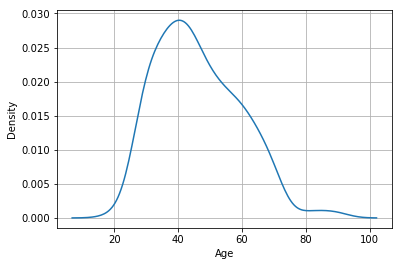

In [33]:
sns.kdeplot(df['Age'])
plt.grid()
plt.show()

ValueError: num must be 1 <= num <= 9, not 10

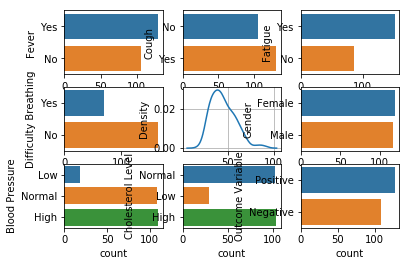

In [62]:
r=3
c=3
it=1
for i in df.drop('Disease',axis=1).columns:
    plt.subplot(r,c,it)
    if df[i].dtype=='object':
        sns.countplot(y=df[i])
    else:
        sns.kdeplot(df[i])
        plt.grid()
    it+=1
plt.tight_layout()
plt.show()

I have the impression that this is not going to be very successful because of the low number of patients overall, and higher number of classes, therefore very low number  of samples per class.
<br>I found another dataset with the same objective that has many more rows, or patients. We will load that one and start to explore it.

#### New dataset
Let us load the dataset and preview the DataFrame.

In [64]:
df=pd.read_csv('Dataset/Training.csv')

In [65]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo,NaN
4916,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,Acne,NaN
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Urinary tract infection,NaN
4918,0,1,0,0,0,0,1,0,0,0,...,0,1,1,1,1,0,0,0,Psoriasis,NaN


Moving to the front the most interesting column, `prognosis`:

In [68]:
df.insert(0, 'prognosis', df.pop('prognosis'))

In [69]:
df

,prognosis,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
0,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
1,Fungal infection,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
2,Fungal infection,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
3,Fungal infection,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,Fungal infection,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4916,Acne,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,NaN
4917,Urinary tract infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4918,Psoriasis,0,1,0,0,0,0,1,0,0,...,0,0,1,1,1,1,0,0,0,NaN


Let us now explore a little more about this dataset:

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 134 entries, prognosis to Unnamed: 133
dtypes: float64(1), int64(132), object(1)
memory usage: 5.0+ MB


We have 4920 entries, definitely a more rich dataset.
<br>Except for 'prognosis', each other column is a symptom.
From the columns we saw that the different symptoms are already one hot encoded.
<br>Let us study a little more the distribution of the diseases.

In [71]:
df['prognosis'].value_counts()

Migraine                                   120
Hepatitis D                                120
AIDS                                       120
Urinary tract infection                    120
Hypothyroidism                             120
Acne                                       120
Cervical spondylosis                       120
Psoriasis                                  120
Impetigo                                   120
Malaria                                    120
(vertigo) Paroymsal  Positional Vertigo    120
Diabetes                                   120
hepatitis A                                120
Hypertension                               120
Arthritis                                  120
Common Cold                                120
Tuberculosis                               120
Chronic cholestasis                        120
Hepatitis E                                120
Gastroenteritis                            120
Bronchial Asthma                           120
Alcoholic hep

Wonderful! As we can see for every disease there are 120 cases. This is great because it's a high enough number that we can expect the model to be able to learn some patterns, and it's also great because it means the classes are already balanced, there aren't diseases that are more or less represented.

In [73]:
disease_counts = df['prognosis'].value_counts().reset_index()
disease_counts.columns = ['Disease', 'Count']

fig = px.pie(disease_counts, 
             values= 'Count', 
             names= 'Disease', 
             color_discrete_sequence= px.colors.sequential.Reds_r, 
             title= 'Disease Distribution')

fig.update_traces(textinfo='percent+label')

fig.show()

Let us now take a look at how the other sympoms are distributed:

In [76]:
df_sympt=df.drop("prognosis", axis='columns')
for i in df_sympt.columns:
    print(df[i].value_counts(normalize=True))
    print("\n")

0    0.862195
1    0.137805
Name: itching, dtype: float64


0    0.840244
1    0.159756
Name: skin_rash, dtype: float64


0    0.978049
1    0.021951
Name: nodal_skin_eruptions, dtype: float64


0    0.954878
1    0.045122
Name: continuous_sneezing, dtype: float64


0    0.978049
1    0.021951
Name: shivering, dtype: float64


0    0.837805
1    0.162195
Name: chills, dtype: float64


0    0.860976
1    0.139024
Name: joint_pain, dtype: float64


0    0.954878
1    0.045122
Name: stomach_pain, dtype: float64


0    0.954878
1    0.045122
Name: acidity, dtype: float64


0    0.978049
1    0.021951
Name: ulcers_on_tongue, dtype: float64


0    0.978049
1    0.021951
Name: muscle_wasting, dtype: float64


0    0.610976
1    0.389024
Name: vomiting, dtype: float64


0    0.956098
1    0.043902
Name: burning_micturition, dtype: float64


0    0.978049
1    0.021951
Name: spotting_ urination, dtype: float64


0    0.607317
1    0.392683
Name: fatigue, dtype: float64


0    0.976829
1    0.02

0    0.976829
1    0.023171
Name: red_sore_around_nose, dtype: float64


0    0.976829
1    0.023171
Name: yellow_crust_ooze, dtype: float64


Series([], Name: Unnamed: 133, dtype: float64)




In [ ]:
for i in df_sympt.columns:
    plotdf[i].value_counts(normalize=True))
    print("\n")

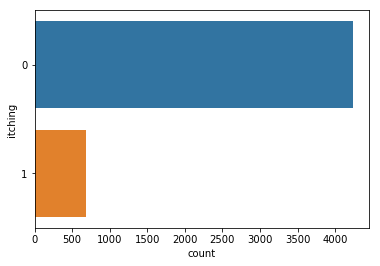

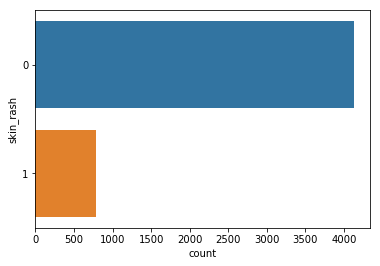

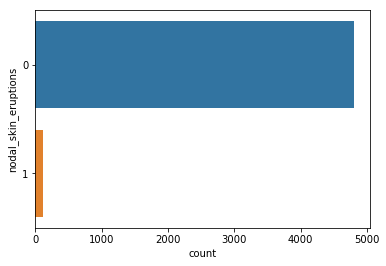

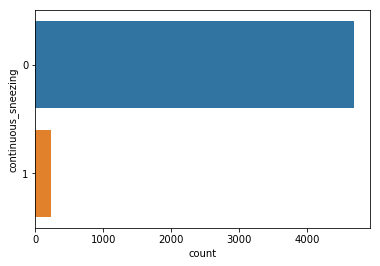

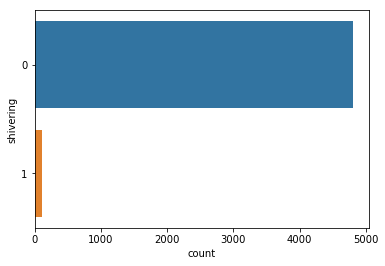

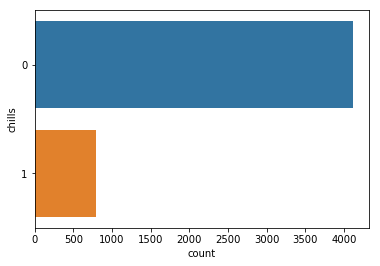

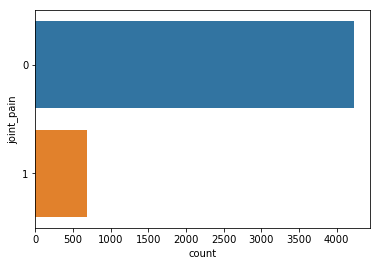

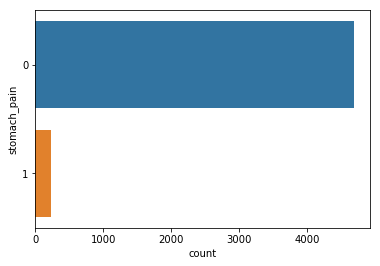

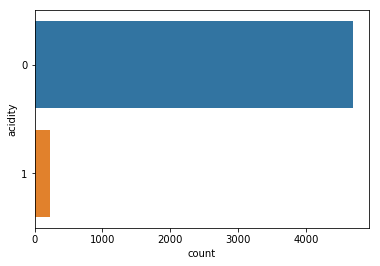

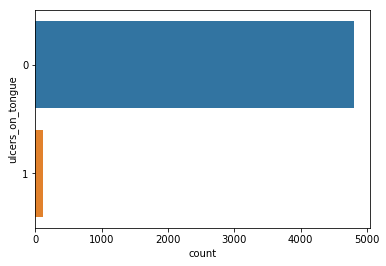

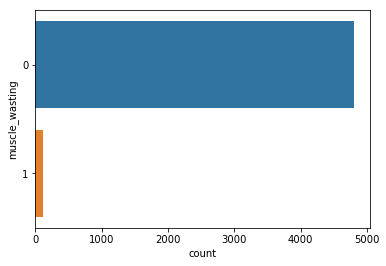

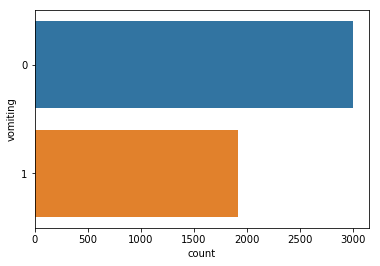

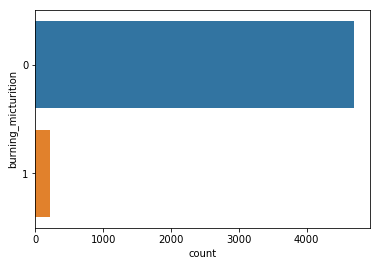

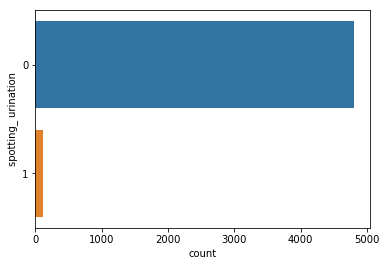

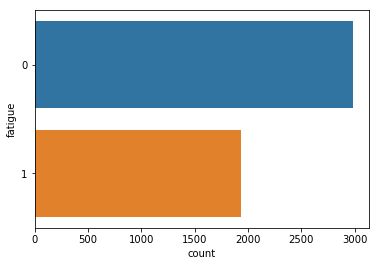

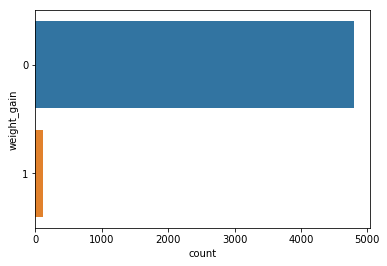

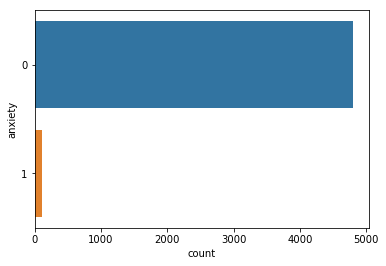

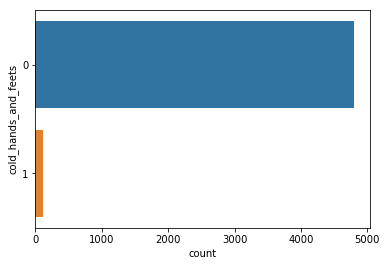

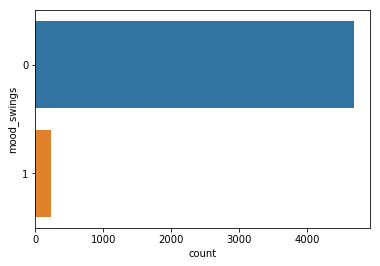

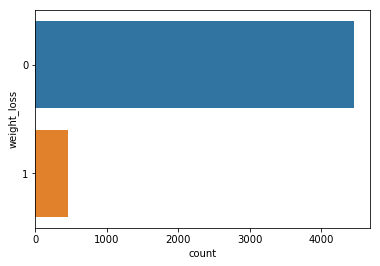

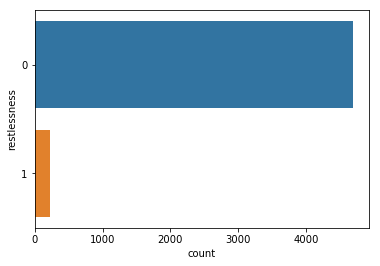

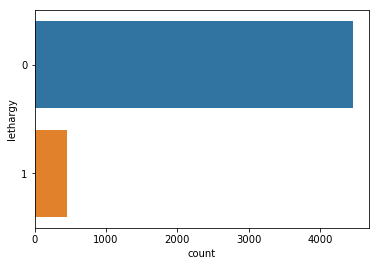

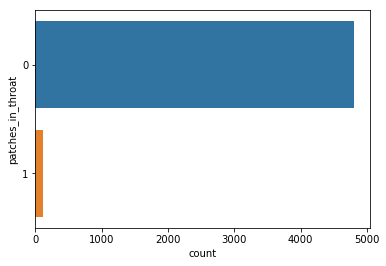

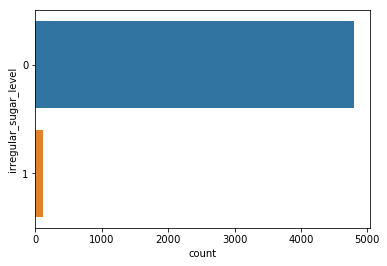

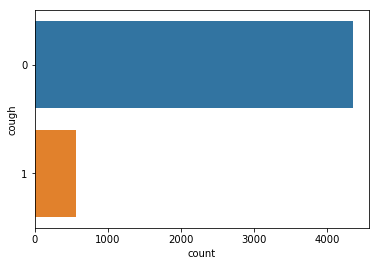

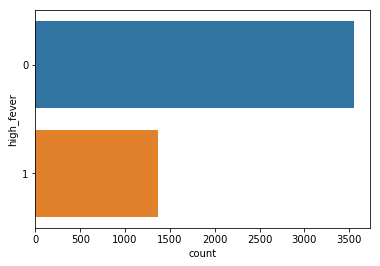

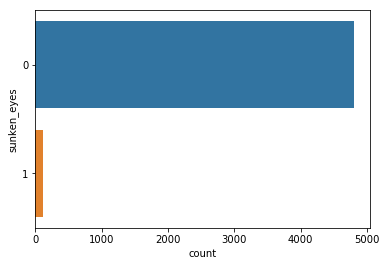

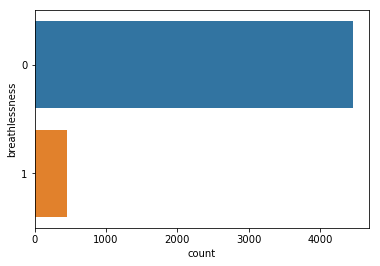

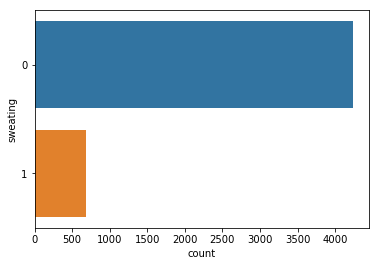

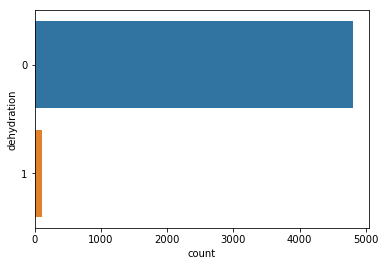

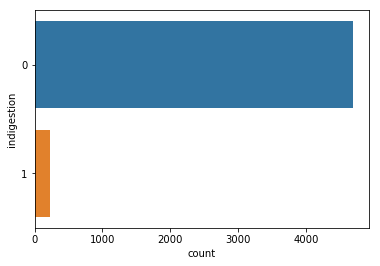

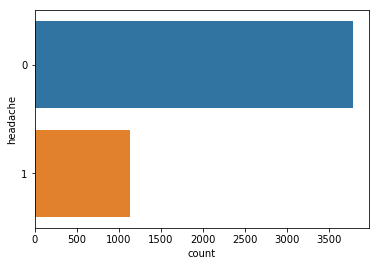

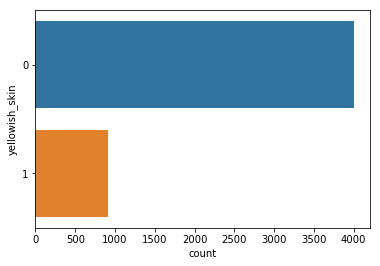

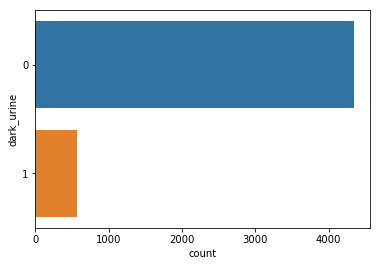

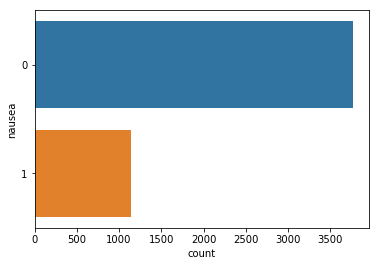

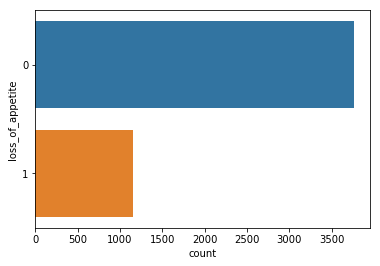

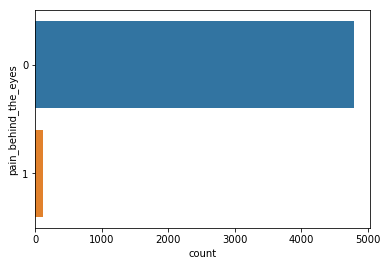

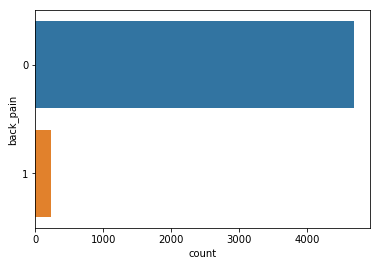

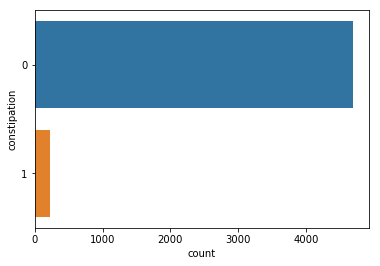

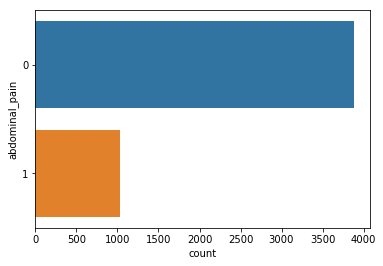

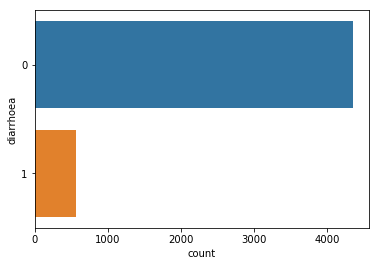

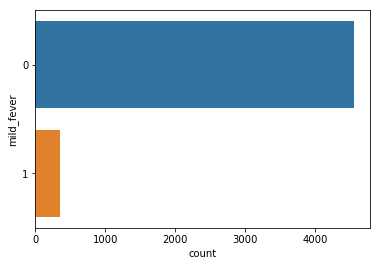

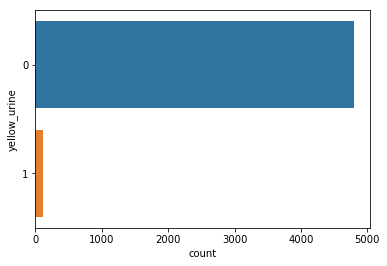

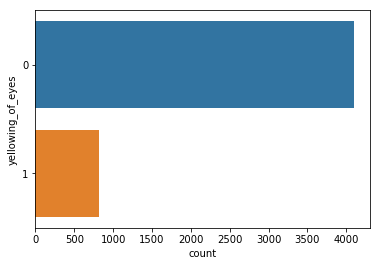

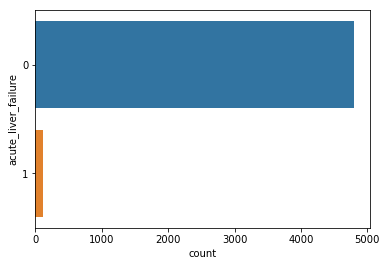

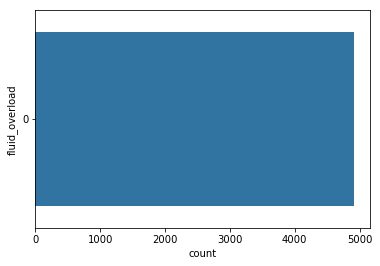

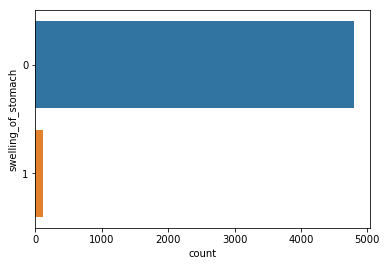

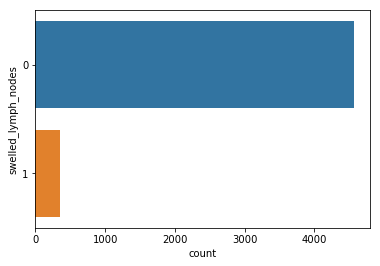

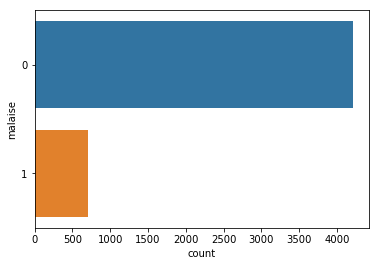

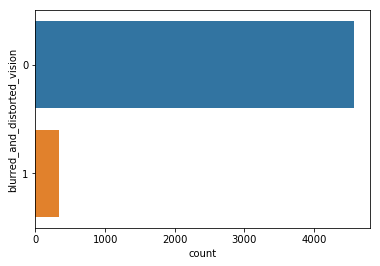

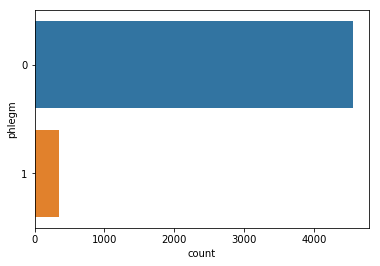

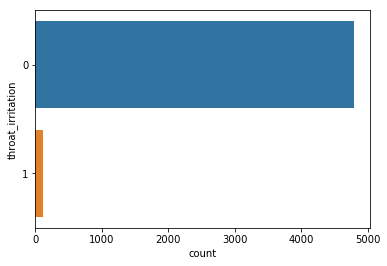

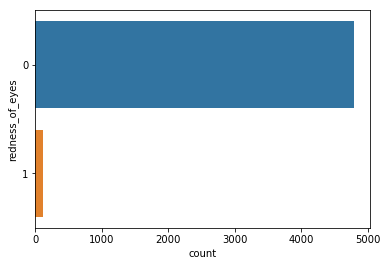

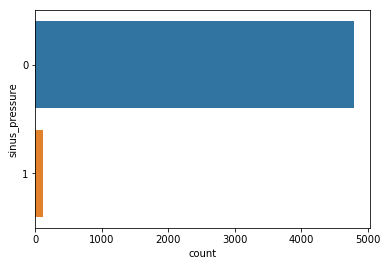

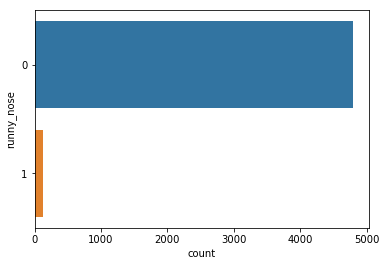

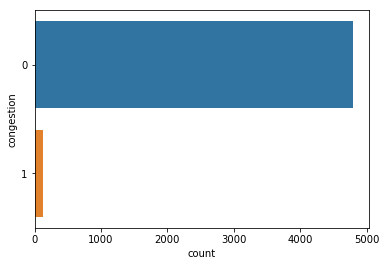

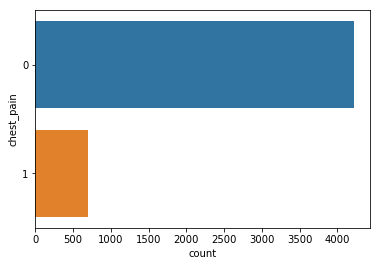

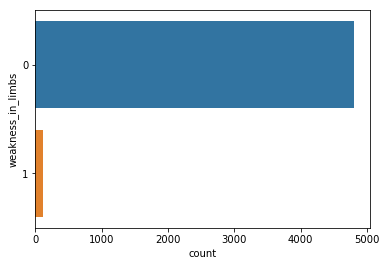

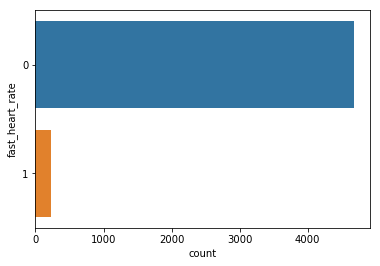

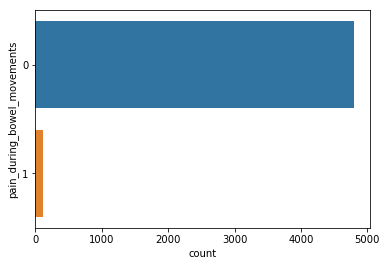

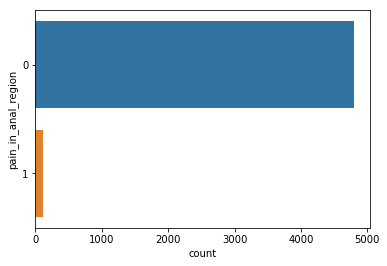

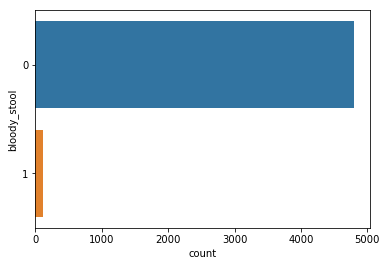

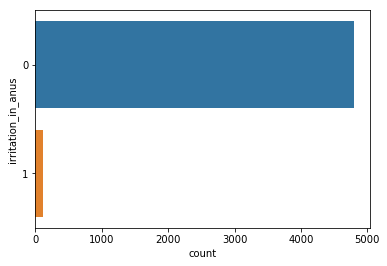

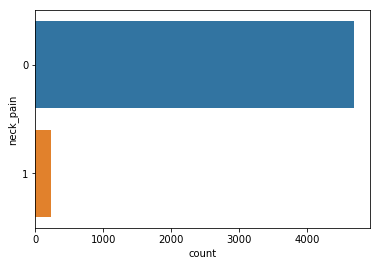

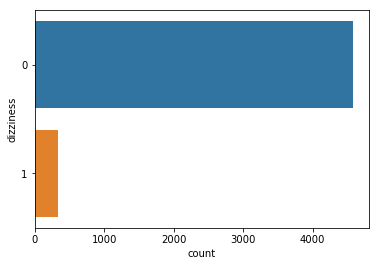

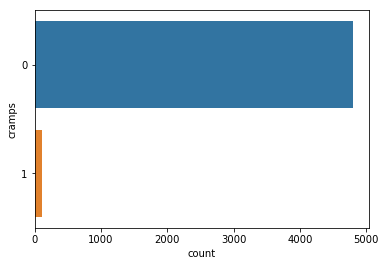

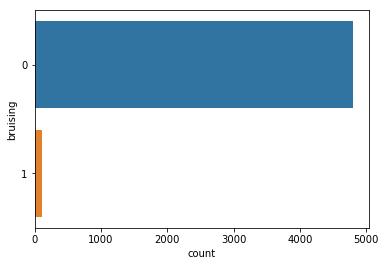

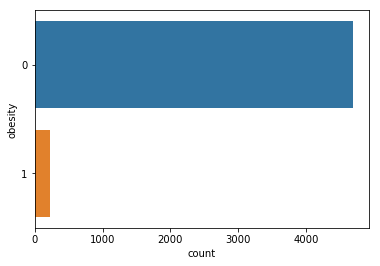

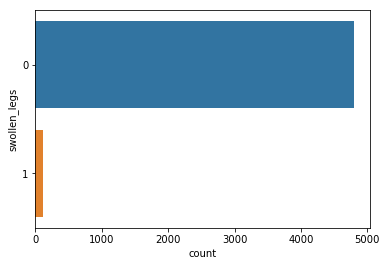

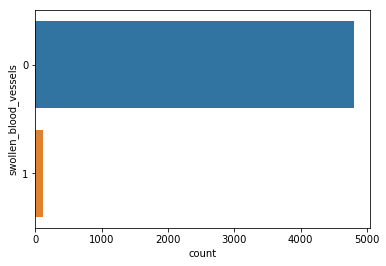

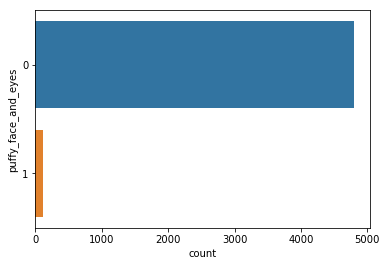

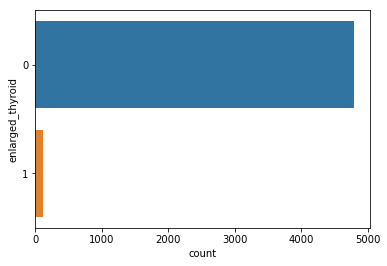

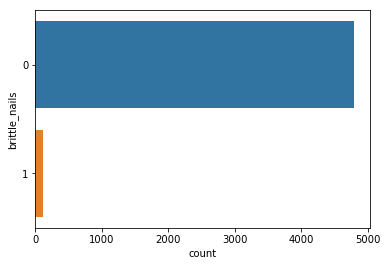

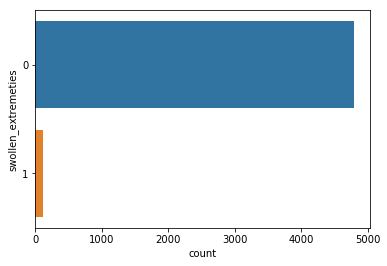

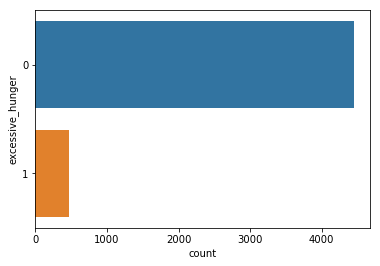

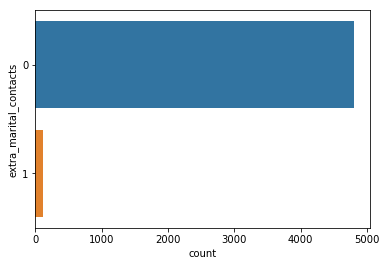

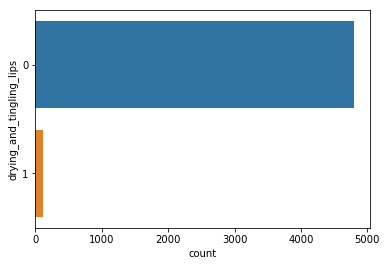

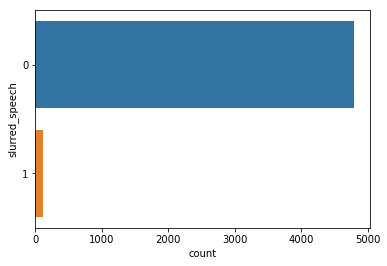

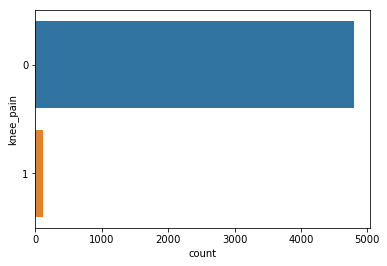

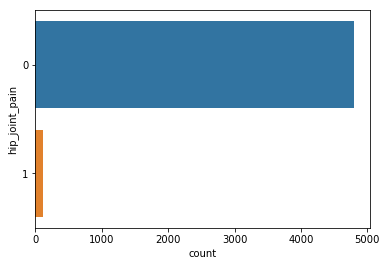

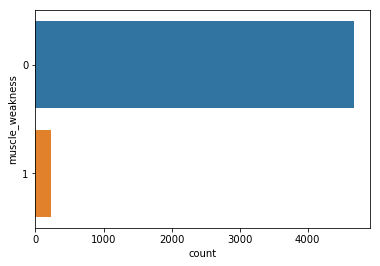

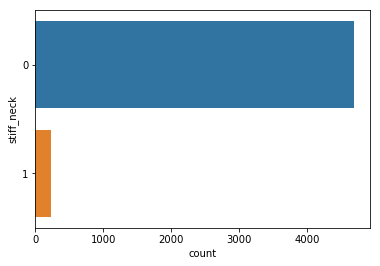

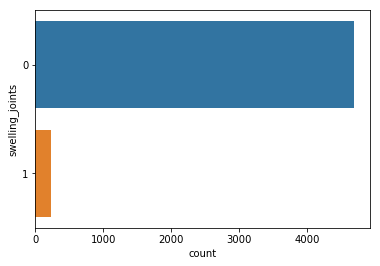

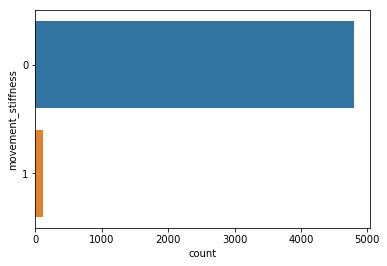

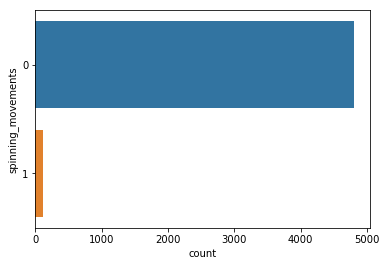

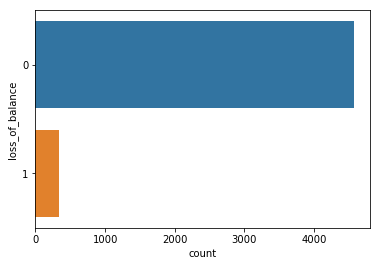

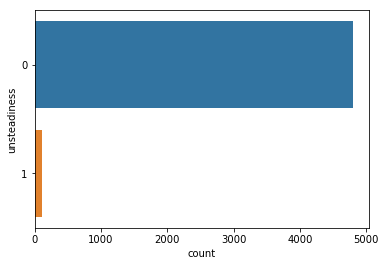

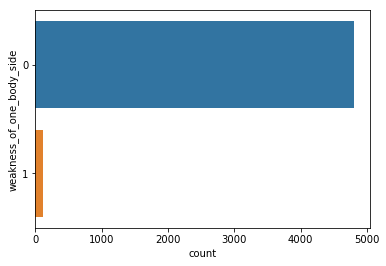

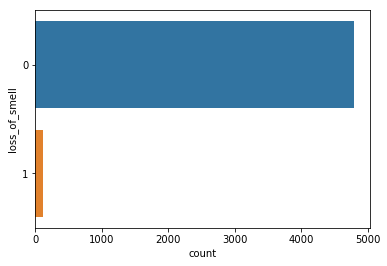

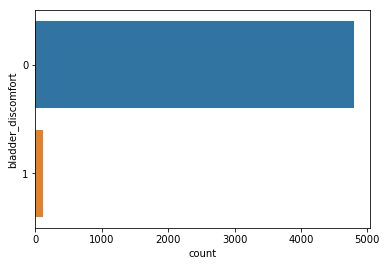

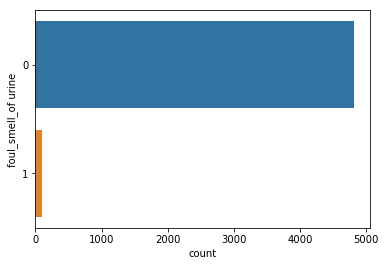

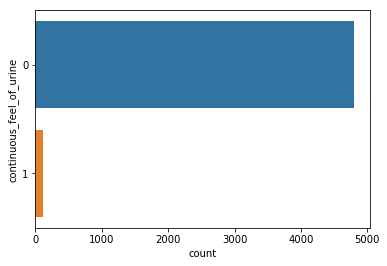

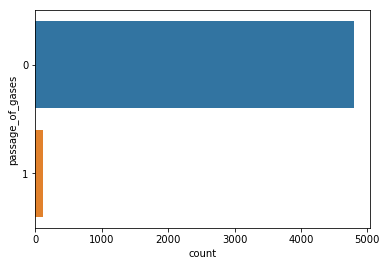

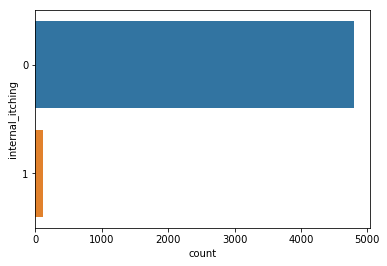

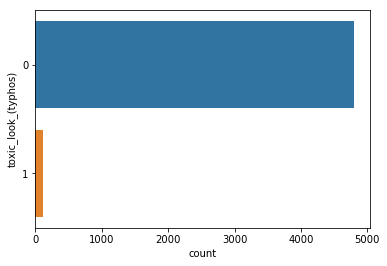

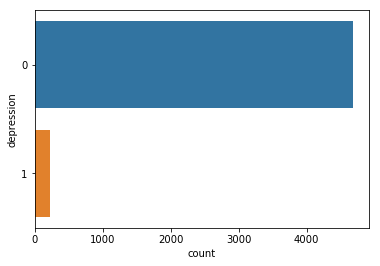

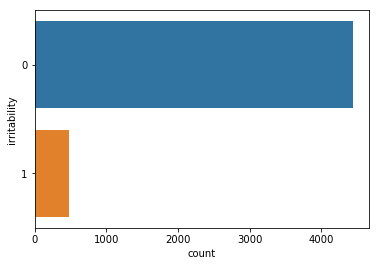

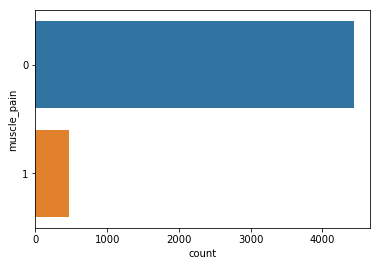

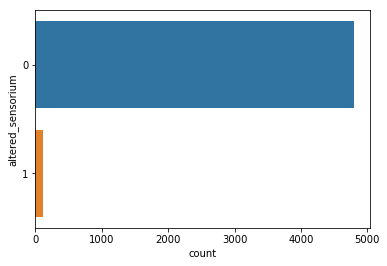

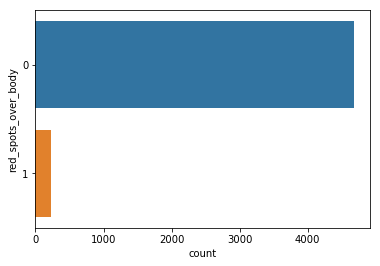

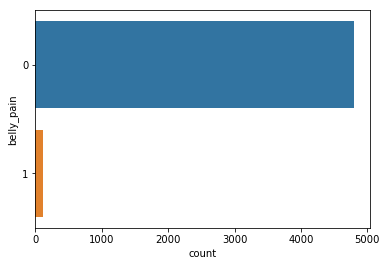

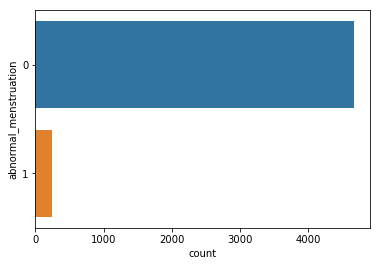

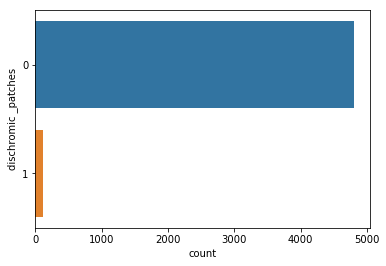

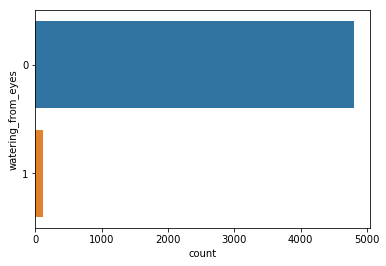

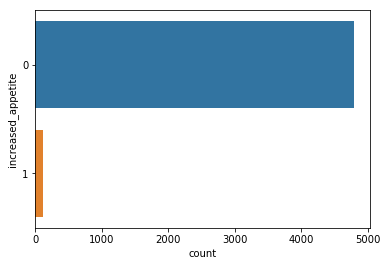

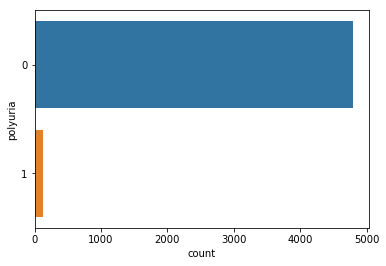

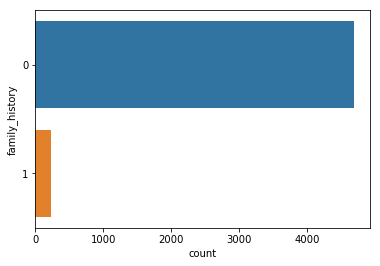

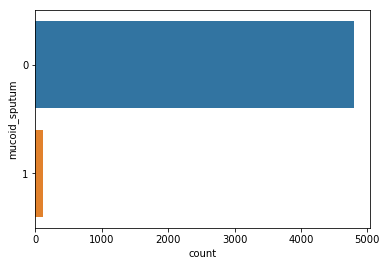

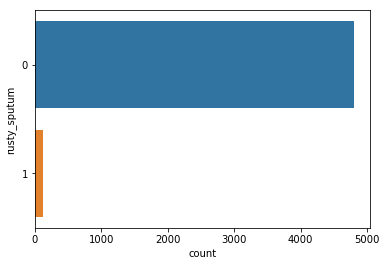

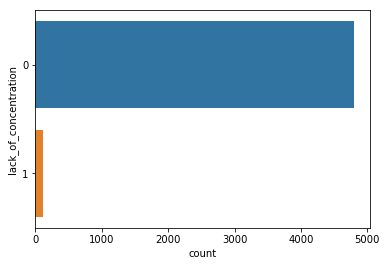

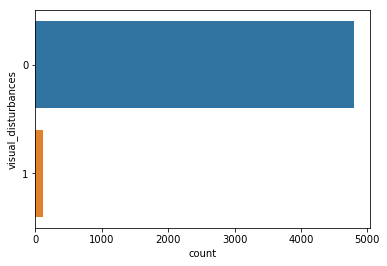

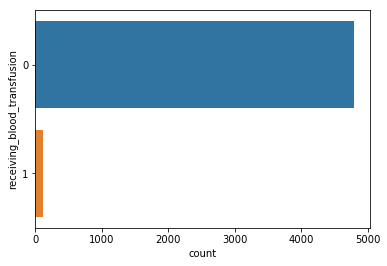

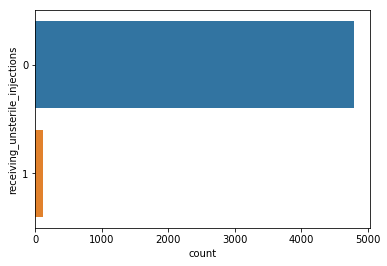

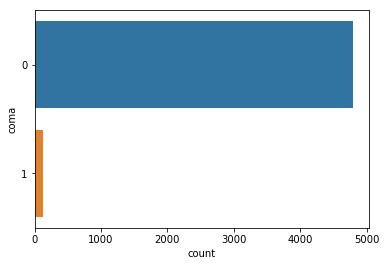

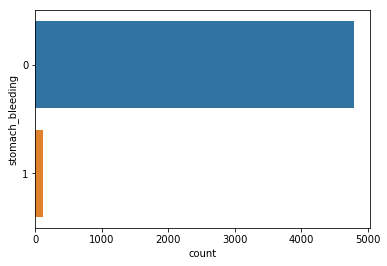

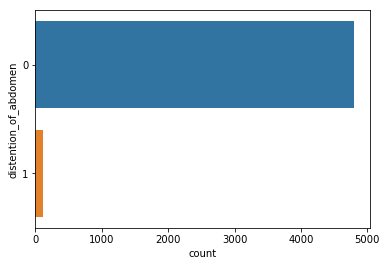

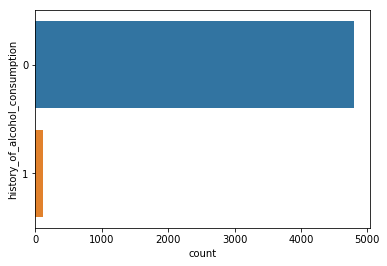

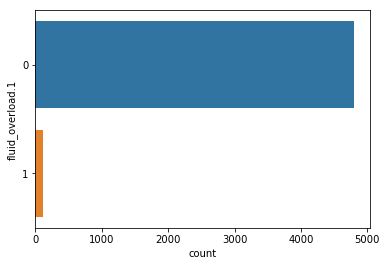

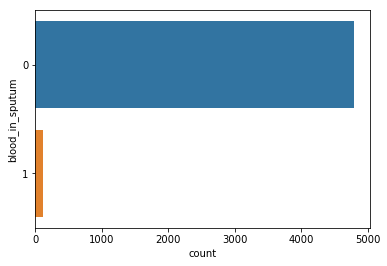

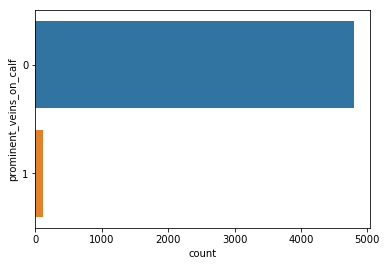

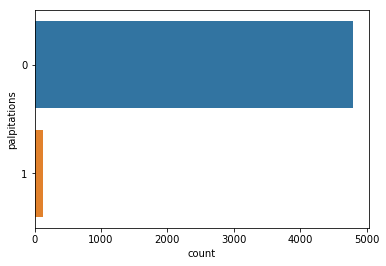

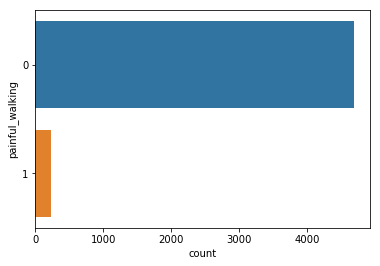

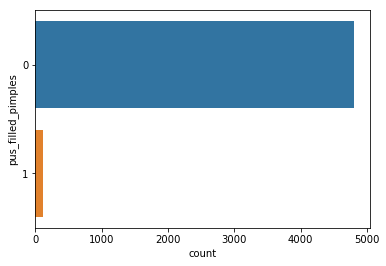

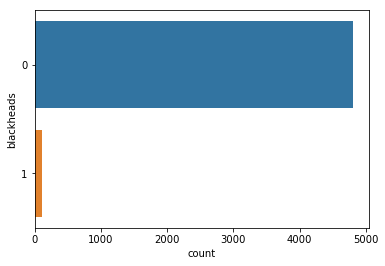

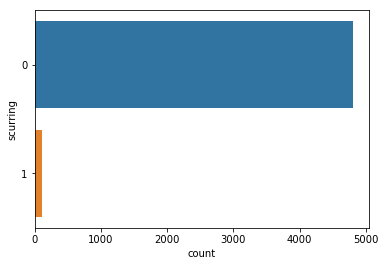

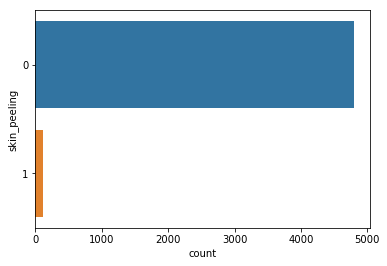

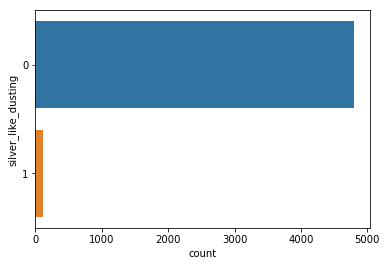

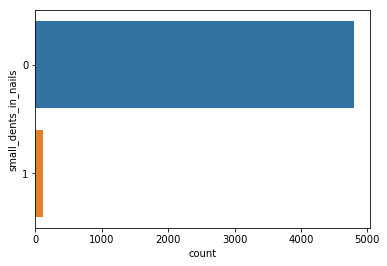

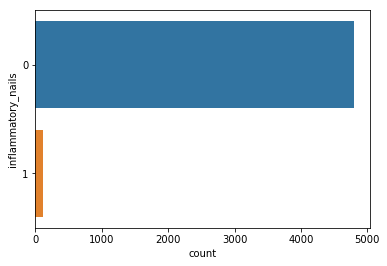

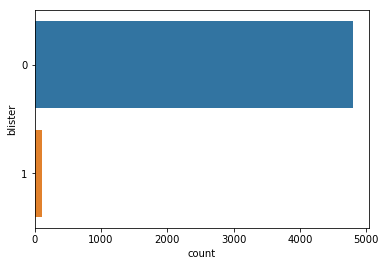

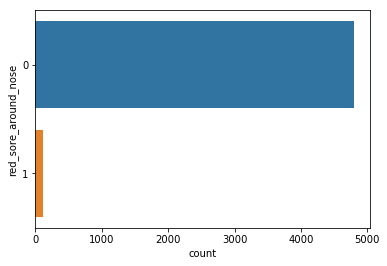

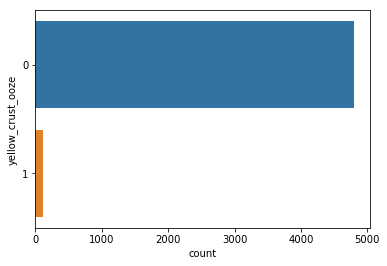

ValueError: min() arg is an empty sequence

In [80]:
for i in df.drop('prognosis',axis=1).columns:
    plt.subplot(r,c,it)
#    if df[i].dtype=='object':
    sns.countplot(y=df[i])
    plt.show()

ValueError: min() arg is an empty sequence

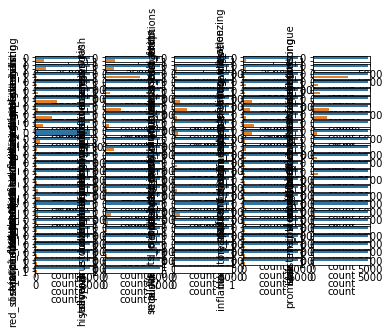

In [81]:
r=27
c=5
it=1
for i in df.drop('prognosis',axis=1).columns:
    plt.subplot(r,c,it)
#    if df[i].dtype=='object':
    sns.countplot(y=df[i])
#    else:
#        sns.kdeplot(df[i])
#        plt.grid()
    it+=1
plt.tight_layout()
plt.show()